**Загрузка библиотек**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**Чтение данных из файла**

In [56]:
file_path = 'C:/Users/Анастасия/time_messagees.txt'  # Путь к вашему файлу с логами
data = pd.read_csv(file_path, delimiter=',', names=['время', 'количество_сообщений'])

In [57]:
print(data['время'])

0        00:00:00
1        00:00:01
2        00:00:02
3        00:00:03
4        00:00:04
           ...   
86391    23:59:51
86392    23:59:52
86393    23:59:53
86394    23:59:54
86395    23:59:55
Name: время, Length: 86396, dtype: object


 **Преобразование времени в числовой формат для удобства обработки**

In [58]:
data['время'] = pd.to_datetime(data['время'], format='%H:%M:%S').dt.hour


**Разделение данных на обучающий и тестовый наборы**

In [59]:
X = data['время'].values.reshape(-1, 1)
y = data['количество_сообщений'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Создание и обучение модели линейной регрессии**

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Предсказание значений на тестовом наборе**

In [61]:
y_pred = model.predict(X_test)

**Оценка качества модели**

In [62]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 361.19
Coefficient of determination: 0.01


**Построение графика**

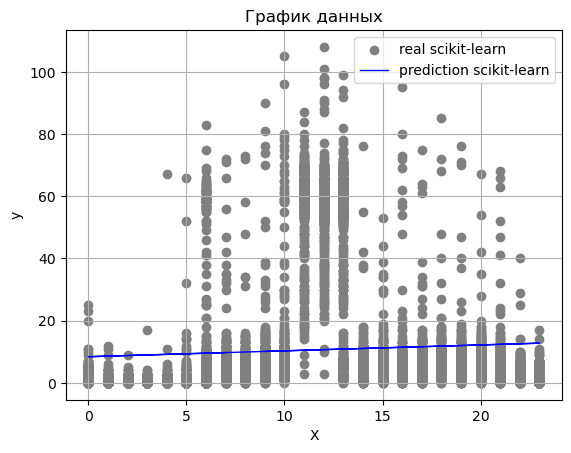

In [63]:
plt.scatter(X_test, y_test, color='grey',label='real scikit-learn')
plt.plot(X_test, y_pred, color='blue', linewidth=1,label='prediction scikit-learn')
plt.title('График данных')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
plt.show()

**Реализуем модель линейной регрессии самостоятельно - не используя библиотек.И сравним графики результатов такого подхода и реализации scikit-learn**
    
    

**Возьмем те же тестовые и тренировочные данные**


In [39]:
X_train2=X_train
X_test2=X_test
y_train2=y_train
y_test2=y_test

**Реализуем модель**

In [40]:
class ModelLin:
    def __init__(self):
        self.коэффициенты = None

    def ModelLearn(self, X, y):
        X_ = np.c_[np.ones(X.shape[0]), X]  # добавляем столбец с единицами для коэффициента сдвига
        self.коэффициенты = np.linalg.inv(X_.T @ X_) @ X_.T @ y  # вычисляем коэффициенты

    def ModelPred(self, X):
        X_ = np.c_[np.ones(X.shape[0]), X]  # добавляем столбец с единицами
        return X_ @ self.коэффициенты  # возвращаем предсказанные значения

**Обучаем модель линейной регрессии**

In [41]:
model = ModelLin()
model.ModelLearn(X_train2, y_train2)


**Предсказание значений на тестовом наборе**

In [42]:
y_pred2 = model.ModelPred(X_test2)

**Оценка качества модели**

In [43]:
print('Mean squared error: %.2f' % mean_squared_error(y_test2, y_pred2))
print('Coefficient of determination: %.2f' % r2_score(y_test2, y_pred2))

Mean squared error: 361.19
Coefficient of determination: 0.01


**Построение графика**

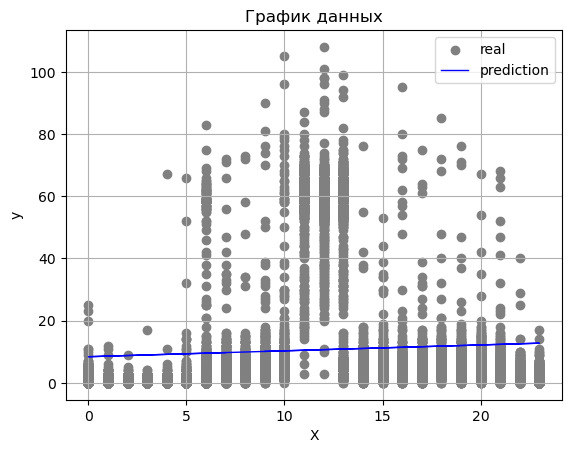

In [44]:
plt.scatter(X_test2, y_test2, color='grey',label='real')
plt.plot(X_test2, y_pred2, color='blue', linewidth=1,label='prediction')
plt.title('График данных')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
plt.show()

**Наложим два графика на  друг друга и посмотрим будет ли визуальная разница, т.к. по оценке качества модели идентичны*

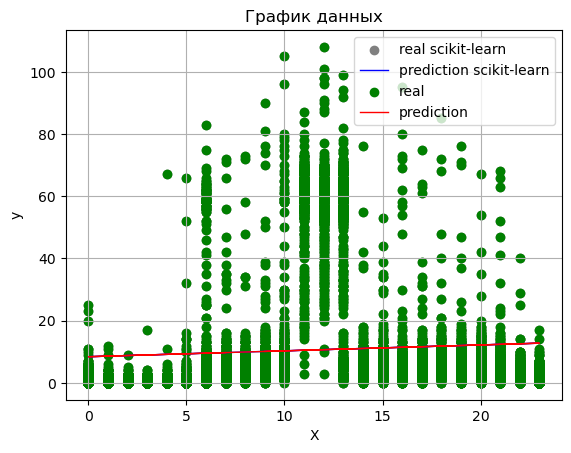

In [45]:
plt.scatter(X_test2, y_test2, color='grey',label='real scikit-learn')
plt.plot(X_test2, y_pred2, color='blue', linewidth=1,label='prediction scikit-learn')
plt.scatter(X_test2, y_test2, color='green',label='real')
plt.plot(X_test2, y_pred2, color='red', linewidth=1,label='prediction')
plt.title('График данных')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
plt.show()

****Выводы****

Построили и обучили модель Линейной регрессии двумя методами : использая библиотеку scikit-learn и не используя библиотек. В обоих случаях получили результат : Mean squared error: 361.19  и Coefficient of determination: 0.01